In [1]:
# 调用相关库
import os  # 导入os模块，用于操作系统功能，比如环境变量
import math  # 导入math模块，提供基本的数学功能
import pandas as pd  # 导入pandas模块，用于数据处理和分析
from math import sqrt  # 从math模块导入sqrt函数，用于计算平方根
from numpy import concatenate  # 从numpy模块导入concatenate函数，用于数组拼接
import matplotlib.pyplot as plt  # 导入matplotlib.pyplot模块，用于绘图
import numpy as np  # 导入numpy模块，用于数值计算
import tensorflow as tf  # 导入tensorflow模块，用于深度学习
from sklearn.preprocessing import MinMaxScaler  # 导入sklearn中的MinMaxScaler，用于特征缩放
from sklearn.preprocessing import StandardScaler  # 导入sklearn中的StandardScaler，用于特征标准化
from sklearn.preprocessing import LabelEncoder  # 导入sklearn中的LabelEncoder，用于标签编码
from sklearn.metrics import mean_squared_error  # 导入sklearn中的mean_squared_error，用于计算均方误差
from tensorflow.keras.layers import *  # 从tensorflow.keras.layers导入所有层，用于构建神经网络
from tensorflow.keras.models import *  # 从tensorflow.keras.models导入所有模型，用于构建和管理模型
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score  # 导入额外的评估指标
from pandas import DataFrame  # 从pandas导入DataFrame，用于创建和操作数据表
from pandas import concat  # 从pandas导入concat函数，用于DataFrame的拼接
import keras.backend as K  # 导入keras的后端接口
from scipy.io import savemat, loadmat  # 从scipy.io导入savemat和loadmat，用于MATLAB文件的读写
from sklearn.neural_network import MLPRegressor  # 从sklearn.neural_network导入MLPRegressor，用于创建多层感知器回归模型
from keras.callbacks import LearningRateScheduler  # 从keras.callbacks导入LearningRateScheduler，用于调整学习率
from tensorflow.keras import Input, Model, Sequential  # 从tensorflow.keras导入Input, Model和Sequential，用于模型构建

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
# 构建时间序列特征集
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    # 定义一个函数，将时间序列数据转换为监督学习数据格式
    n_vars = 1 if type(data) is list else data.shape[1]
    # 根据输入数据的类型（列表或其他）来决定变量的数量
    df = DataFrame(data)
    # 将数据转换为pandas DataFrame
    cols, names = list(), list()
    # 初始化两个列表，用于存储数据列和列名

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        # 创建输入序列
        cols.append(df.shift(i))
        # 将DataFrame向下移动i个单位，生成序列
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
        # 生成列名，表示每个时刻的变量

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        # 创建输出序列（预测值）
        cols.append(df.shift(-i))
        # 将DataFrame向上移动i个单位，生成序列
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
        # 生成列名，表示预测的未来时刻的变量

    # put it all together
    agg = concat(cols, axis=1)
    # 将所有生成的列合并成一个新的DataFrame
    agg.columns = names
    # 设置新DataFrame的列名

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        # 如果dropnan为真，则删除含有NaN的行

    return agg
    # 返回处理后的数据

In [3]:
dataset=pd.read_csv("农林牧渔.csv", encoding='gbk')
# 使用pandas模块的read_csv函数读取名为"农林牧渔.csv"的文件。
# 参数'encoding'设置为'gbk'，这通常用于读取中文字符，确保文件中的中文字符能够正确读取。
# 读取的数据被存储在名为'dataset'的DataFrame变量中。
dataset#显示dataset数据

,发布日期,收盘指数,开盘指数,最高指数,最低指数,成交量(亿股),成交额(亿元),涨跌幅(%)
0,2022/5/20 0:00,3259.34,3223.16,3267.41,3220.70,25.14,243.93,0.77
1,2022/5/19 0:00,3234.45,3211.60,3265.00,3208.24,25.61,254.88,-0.86
2,2022/5/18 0:00,3262.52,3255.59,3280.32,3245.07,21.21,204.77,-0.17
3,2022/5/17 0:00,3267.97,3301.25,3301.25,3255.96,26.54,268.17,-1.14
4,2022/5/16 0:00,3305.64,3241.51,3311.60,3221.92,30.75,301.98,3.09
...,...,...,...,...,...,...,...,...
5401,2000/1/7 0:00,1106.19,1076.06,1117.71,1058.83,0.65,8.75,3.80
5402,2000/1/6 0:00,1065.67,1025.38,1070.79,1011.00,0.30,4.21,3.58
5403,2000/1/5 0:00,1028.87,1035.47,1057.85,1013.07,0.25,2.90,0.12
5404,2000/1/4 0:00,1027.66,1001.98,1035.36,985.47,0.14,1.83,2.77


In [4]:
values = dataset.values[:,1:]
# 从dataset DataFrame中提取数据。
# dataset.values将DataFrame转换为numpy数组。
# [:,1:]表示选择所有行（:）和从第二列到最后一列（1:）的数据。
# 这样做通常是为了去除第一列，这在第一列是索引或不需要的数据时很常见。

In [5]:
# 确保所有数据是浮动的
values = values.astype('float32')
# 将values数组中的数据类型转换为float32。
# 这通常用于确保数据类型的一致性，特别是在准备输入到神经网络模型中时。

n_in=12
# 设置输入序列的长度为12。
# 这意味着每个输入序列将包含过去12个时间点的数据。

n_out=6
# 设置输出序列的长度为6。
# 这意味着模型将尝试预测未来6个时间点的数据。

n_vars=values.shape[1]
# 获取values数组的列数，即变量的数量。

# 构建成监督学习问题
reframed = series_to_supervised(values, n_in, n_out)
# 使用series_to_supervised函数将数据转换为监督学习格式。
# values是要转换的数据，n_in是输入序列的长度，n_out是输出序列的长度。
# 此函数返回一个新的DataFrame，其中包含用于训练监督学习模型所需的输入和输出数据。

In [6]:
# 取出保留的变量
contain_vars = []
# 初始化一个空列表，用于存储需要保留的列名。

for i in range(1, n_in+1):
    contain_vars += [('var%d(t-%d)' % (j, i)) for j in range(1, n_vars+1)]
    # 遍历从1到n_in的数字，每次迭代都会生成一组列名。
    # 这些列名表示过去n_in个时间步的每个变量（比如var1(t-1), var2(t-1), ..., var1(t-n_in), var2(t-n_in)等）。

data = reframed[contain_vars + ['var1(t)'] + [('var1(t+%d)' % (j)) for j in range(1, n_out)]]
# 从reframed数据框中提取特定的列。
# 'contain_vars'包含了输入序列需要的所有列。
# ['var1(t)'] 是当前时间步的第一个变量。
# [('var1(t+%d)' % (j)) for j in range(1, n_out)] 生成了输出序列的列名，即预测未来n_out-1个时间步的第一个变量。

In [4]:
# 把数据集分为训练集和测试集
values = data.values
# 将前面处理好的DataFrame（data）转换成numpy数组，方便后续的数据操作。

n_train_hours = int(values.shape[0] * 0.5)
# 计算训练集的大小。
# values.shape[0] 获取数据的总行数，乘以0.5表示使用数据集的一半作为训练集。
# int(...) 确保得到的训练集大小是一个整数。

train = values[:n_train_hours, :]
# 从values数组中取出前n_train_hours行作为训练集。
# [:n_train_hours, :] 表示取所有行直到n_train_hours行，取所有列。

test = values[n_train_hours:, :]
# 从values数组中取出剩下的行作为测试集。
# [n_train_hours:, :] 表示从n_train_hours行到最后一行，取所有列。

NameError: name 'data' is not defined

In [8]:
# 标准化
scaler = StandardScaler()
# 创建一个StandardScaler对象。
# StandardScaler用于标准化数据，即对数据进行缩放，使其均值为0，标准差为1。

train = scaler.fit_transform(train)
# 对训练集数据进行标准化。
# fit_transform()方法首先计算训练集的均值和标准差，然后使用这些参数将数据转换为标准形式。
# 这样做的目的是使模型训练时更容易收敛。

test = scaler.fit_transform(test)
# 对测试集数据进行标准化。
# 注意这里也使用了fit_transform()，这意味着测试数据的标准化是独立于训练数据完成的。
# 在实际应用中，通常使用训练集的均值和标准差来转换测试集（即使用scaler.transform(test)），以保证测试数据的标准化方式与训练数据一致。


In [9]:
train_X, train_y = train[:, :n_in*n_vars], train[:, n_in*n_vars:]
# 将训练集数据分为输入和输出。
# train[:, :n_in*n_vars] 获取训练集数据的前n_in*n_vars列，作为输入特征（train_X）。
# train[:, n_in*n_vars:] 获取训练集数据的从n_in*n_vars列到最后的列，作为输出目标（train_y）。

test_X, test_y = test[:, :n_in*n_vars], test[:, n_in*n_vars:]
# 将测试集数据分为输入和输出。
# test[:, :n_in*n_vars] 获取测试集数据的前n_in*n_vars列，作为输入特征（test_X）。
# test[:, n_in*n_vars:] 获取测试集数据的从n_in*n_vars列到最后的列，作为输出目标（test_y）。


In [10]:
train_X = train_X.reshape((train_X.shape[0], n_in, n_vars))
# 将训练集的输入数据train_X重塑成三维格式。
# train_X.shape[0]是样本数量，n_in是时间步长，n_vars是每个时间步的特征数量。
# 结果是一个三维数组，其形状为[样本数量, 时间步长, 特征数量]。

test_X = test_X.reshape((test_X.shape[0], n_in, n_vars))
# 将测试集的输入数据test_X重塑成三维格式。
# test_X.shape[0]是样本数量，n_in是时间步长，n_vars是每个时间步的特征数量。
# 结果是一个三维数组，其形状为[样本数量, 时间步长, 特征数量]。


In [11]:
from keras.layers import Dense, Activation, Dropout, LSTM, LayerNormalization, Input
# 从keras.layers模块导入多个层类。
# Dense是全连接层，用于构建神经网络。
# Activation是激活层，用于应用激活函数。
# Dropout是丢弃层，用于减少过拟合。
# LSTM是长短时记忆网络层，用于处理序列数据。
# LayerNormalization是层归一化，用于标准化层的输出。
# Input是输入层，用于定义模型输入的形状。
from tensorflow.keras.models import Model
# 从tensorflow.keras.models模块导入Model类。
# Model是用于构建和训练深度学习模型的基类。
from sklearn.model_selection import KFold
# 从sklearn.model_selection模块导入KFold类。
# KFold是一种交叉验证方法，用于评估模型的泛化能力。

In [12]:
def lstm_model():
    # 定义一个函数来创建LSTM模型

    inputs = Input(shape=(train_X.shape[1], train_X.shape[2]))
    # 创建模型的输入层，输入的形状为train_X的第二维和第三维（时间步和特征数）

    lstm = LSTM(128, activation='selu', return_sequences=False)(inputs)
    # 添加一个LSTM层，其中有128个神经元，激活函数为'selu'。
    # return_sequences=False表示LSTM层只返回最后一个时间步的输出。

    outputs = Dense(train_y.shape[1])(lstm)
    # 创建一个全连接层，神经元的数量等于train_y的列数（输出维度）

    model = Model(inputs=inputs, outputs=outputs)
    # 创建模型，指定输入和输出

    model.compile(loss='mse', optimizer='Adam')
    # 编译模型，设置损失函数为均方误差（mse），优化器为Adam

    model.summary()
    # 展示模型的结构

    return model
    # 返回构建的模型

model = lstm_model()
# 调用lstm_model函数来建立LSTM模型

kf = KFold(n_splits=4)
# 创建一个KFold实例，用于交叉验证，设置折数为4

history = model.fit(train_X, train_y, batch_size=32, epochs=100, validation_split=0.25, verbose=2)
# 训练模型
# train_X和train_y是训练数据和标签
# batch_size=32设置批处理大小为32
# epochs=100设置训练的总轮数为100
# validation_split=0.25使用25%的数据作为验证集
# verbose=2显示训练过程中的详细信息


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 7)]           0         
                                                                 
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 70,406
Trainable params: 70,406
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
64/64 - 2s - loss: 0.1021 - val_loss: 0.0098 - 2s/epoch - 31ms/step
Epoch 2/100
64/64 - 1s - loss: 0.0182 - val_loss: 0.0145 - 848ms/epoch - 13ms/step
Epoch 3/100
64/64 - 1s - loss: 0.0152 - val_loss: 0.0046 - 876ms/epoch - 14ms/step
Epoch 4/100
64/64 - 1s - loss: 0.0149 - val_loss: 0.0093 - 873ms/epoch - 14

64/64 - 1s - loss: 0.0035 - val_loss: 0.0071 - 898ms/epoch - 14ms/step
Epoch 88/100
64/64 - 1s - loss: 0.0038 - val_loss: 0.0072 - 904ms/epoch - 14ms/step
Epoch 89/100
64/64 - 1s - loss: 0.0033 - val_loss: 0.0069 - 927ms/epoch - 14ms/step
Epoch 90/100
64/64 - 1s - loss: 0.0036 - val_loss: 0.0068 - 912ms/epoch - 14ms/step
Epoch 91/100
64/64 - 1s - loss: 0.0040 - val_loss: 0.0068 - 958ms/epoch - 15ms/step
Epoch 92/100
64/64 - 1s - loss: 0.0038 - val_loss: 0.0076 - 932ms/epoch - 15ms/step
Epoch 93/100
64/64 - 1s - loss: 0.0031 - val_loss: 0.0090 - 923ms/epoch - 14ms/step
Epoch 94/100
64/64 - 1s - loss: 0.0032 - val_loss: 0.0069 - 919ms/epoch - 14ms/step
Epoch 95/100
64/64 - 1s - loss: 0.0030 - val_loss: 0.0077 - 913ms/epoch - 14ms/step
Epoch 96/100
64/64 - 1s - loss: 0.0028 - val_loss: 0.0085 - 917ms/epoch - 14ms/step
Epoch 97/100
64/64 - 1s - loss: 0.0029 - val_loss: 0.0095 - 929ms/epoch - 15ms/step
Epoch 98/100
64/64 - 1s - loss: 0.0029 - val_loss: 0.0084 - 905ms/epoch - 14ms/step
Epoch

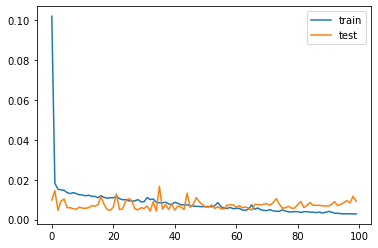

In [13]:
# 绘制历史数据
plt.plot(history.history['loss'], label='train')
# 绘制训练过程中的损失曲线。
# history.history['loss']获取训练集上每个epoch的损失值。
# 'label='train''设置该曲线的标签为'train'。

plt.plot(history.history['val_loss'], label='test')
# 绘制验证过程中的损失曲线。
# history.history['val_loss']获取验证集上每个epoch的损失值。
# 'label='test''设置该曲线的标签为'test'。

plt.legend()
# 显示图例，方便识别每条曲线代表的数据集。

plt.show()
# 展示绘制的图像。


In [14]:
# 作出预测
yhat = model.predict(test_X)
# 使用模型对测试集的输入特征(test_X)进行预测。
# yhat是模型预测的输出值。

yhat = yhat.reshape(-1, 1)
# 将预测值yhat重塑为二维数组，以便进行后续操作。

yhat = np.repeat(yhat, n_in * n_vars + n_out, axis=-1)
# 对预测值进行重复扩展，以匹配反向缩放操作的维度要求。
# 这是因为scaler对象在标准化过程中期望输入具有与训练时相同的列数。

inv_yhat = scaler.inverse_transform(np.reshape(yhat, (len(yhat), n_in * n_vars + n_out)))[:, 0]
# 使用scaler.inverse_transform将标准化的预测值转换回原始的比例。
# np.reshape操作确保数据具有适当的形状。
# [:, 0]选择转换后数组的第一列，即我们关心的预测值。

inv_yhat = inv_yhat.reshape(-1, n_out)
# 将预测值重塑为原始的预测格式。

test_y = test_y.reshape(-1, 1)
# 将测试集的实际值（test_y）重塑为二维数组。

y = np.repeat(test_y, n_in * n_vars + n_out, axis=-1)
# 对实际值进行重复扩展，以匹配反向缩放操作的维度要求。

inv_y = scaler.inverse_transform(np.reshape(y, (len(test_y), n_in * n_vars + n_out)))[:, 0]
# 使用scaler.inverse_transform将标准化的实际值转换回原始的比例。

inv_y = inv_y.reshape(-1, n_out)
# 将实际值重塑为原始的格式。


In [15]:
def mape(y_true, y_pred):
    # 定义一个计算平均绝对百分比误差（MAPE）的函数。
    record = []
    for index in range(len(y_true)):
        # 遍历实际值和预测值。
        if abs(y_true[index]) > 10:
            # 如果实际值的绝对值大于10，则计算MAPE。
            temp_mape = np.abs((y_pred[index] - y_true[index]) / y_true[index])
            # 计算单个预测的MAPE。
            record.append(temp_mape)
            # 将MAPE添加到记录列表中。
    return np.mean(record) * 100
    # 返回所有记录的平均值，乘以100得到百分比。

def evaluate_forecasts(test, forecasts, n_out):
    # 定义一个函数来评估预测的性能。
    rmse_dic = {}
    mae_dic = {}
    mape_dic = {}
    r2_dic = {}
    # 初始化存储各个评估指标的字典。

    for i in range(n_out):
        # 遍历每一个预测步长。
        actual = [float(row[i]) for row in test]
        # 从测试集中提取实际值。
        predicted = [float(forecast[i]) for forecast in forecasts]
        # 从预测结果中提取预测值。

        rmse = sqrt(mean_squared_error(actual, predicted))
        # 计算均方根误差（RMSE）。
        rmse_dic['t+' + str(i+1) + ' RMSE'] = rmse
        # 将RMSE结果添加到字典中。

        mae = mean_absolute_error(actual, predicted)
        # 计算平均绝对误差（MAE）。
        mae_dic['t+' + str(i+1) + ' MAE'] = mae
        # 将MAE结果添加到字典中。

        mape_ = mape(actual, predicted)
        # 计算平均绝对百分比误差（MAPE）。
        mape_dic['t+' + str(i+1) + ' MAPE'] = mape_
        # 将MAPE结果添加到字典中。

        r2 = r2_score(actual, predicted)
        # 计算R平方值（R2）。
        r2_dic['t+' + str(i+1) + ' R2'] = r2
        # 将R2结果添加到字典中。

    return rmse_dic, mae_dic, mape_dic, r2_dic
    # 返回包含所有评估指标的字典。

In [16]:
dic_list = []
# 初始化一个空列表，用于存储评估结果。

dic = evaluate_forecasts(inv_y, inv_yhat, n_out)
# 调用evaluate_forecasts函数。
# 传递实际值(inv_y)、预测值(inv_yhat)以及预测的步数(n_out)作为参数。
# 此函数将计算每个预测步长的RMSE、MAE、MAPE和R2值。

dic_list.append(dic)
# 将评估结果（一个包含四种评估指标的字典）添加到dic_list列表中。


In [17]:
dic_list#显示预测指标数值

[({'t+1 RMSE': 34.44190080008121,
   't+2 RMSE': 57.4516338091881,
   't+3 RMSE': 77.9123823667243,
   't+4 RMSE': 94.91185300646333,
   't+5 RMSE': 105.28412822292097,
   't+6 RMSE': 115.47631960553257},
  {'t+1 MAE': 26.035793688036293,
   't+2 MAE': 41.0486542144379,
   't+3 MAE': 53.802746695269015,
   't+4 MAE': 68.03069787529714,
   't+5 MAE': 74.58194702374914,
   't+6 MAE': 82.07619169160917},
  {'t+1 MAPE': 2.636203903562277,
   't+2 MAPE': 3.6952719000507477,
   't+3 MAPE': 4.530007936306965,
   't+4 MAPE': 5.872364049030524,
   't+5 MAPE': 6.170151108764304,
   't+6 MAPE': 6.830557810011009},
  {'t+1 R2': 0.996729308075804,
   't+2 R2': 0.9908993964045072,
   't+3 R2': 0.9832629703348889,
   't+4 R2': 0.9751625888533576,
   't+5 R2': 0.969437334450386,
   't+6 R2': 0.9632335840876847})]

In [18]:
actual = dataset['收盘指数'].values[-len(inv_yhat):]  # 真实值
# 从数据集中提取"收盘指数"列的值作为真实值。
# 由于预测值inv_yhat的长度可能不同于原始数据集，因此只取与inv_yhat长度相同的最后部分数据。

predicted_1st = [float(forecast[0]) for forecast in inv_yhat]
# 从反向缩放后的预测值集合(inv_yhat)中提取每个样本的第一个预测值。
# 这个列表包含了模型对于时间步长t+1的所有预测值。

predicted_3st = [float(forecast[2]) for forecast in inv_yhat]
# 从反向缩放后的预测值集合(inv_yhat)中提取每个样本的第三个预测值。
# 这个列表包含了模型对于时间步长t+3的所有预测值。

predicted_6st = [float(forecast[5]) for forecast in inv_yhat]
# 从反向缩放后的预测值集合(inv_yhat)中提取每个样本的第六个预测值。
# 这个列表包含了模型对于时间步长t+6的所有预测值。


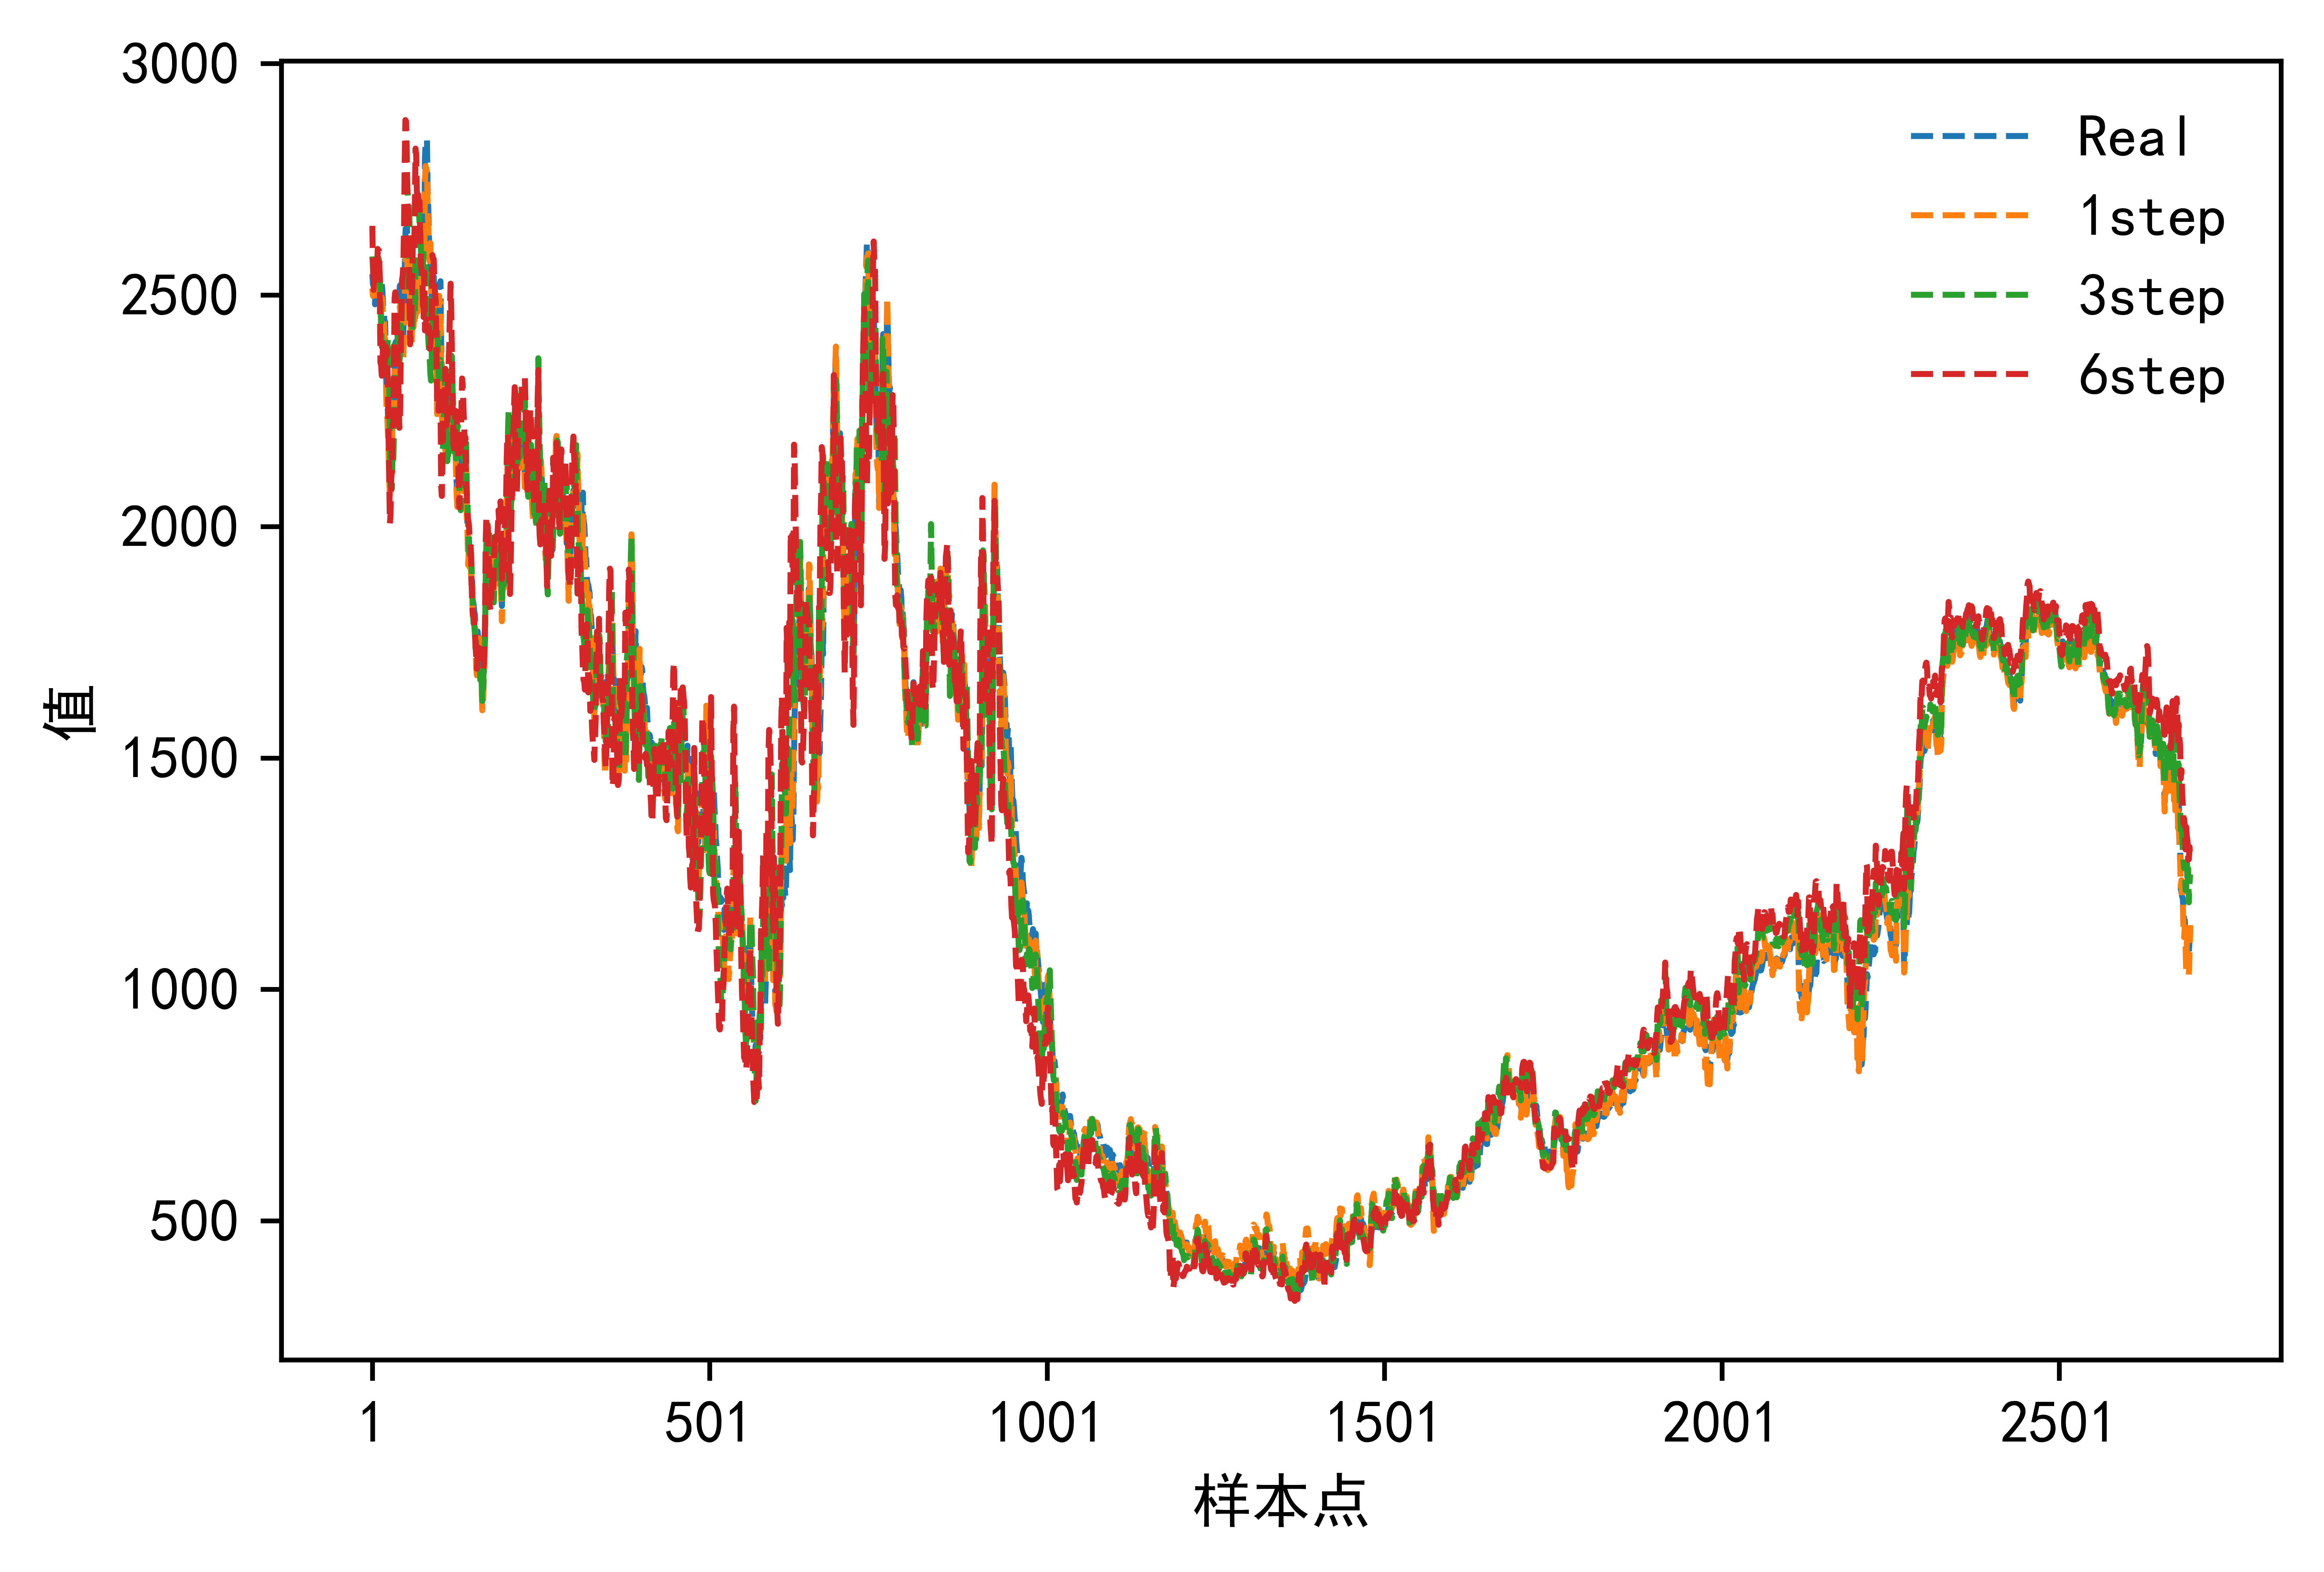

In [19]:
import seaborn as sns
# 导入seaborn库，用于数据可视化。

%config InlineBackend.figure_format = 'retina'
# 设置Jupyter笔记本中的图形格式为高分辨率的'retina'格式。

plt.rcParams['font.sans-serif']=['Simhei']  #解决画图中文不显示问题
# 设置matplotlib的默认字体为Simhei，以解决中文显示问题。

plt.rcParams['axes.unicode_minus'] = False
# 设置matplotlib的配置，用来正常显示负号。

plt.figure(figsize=(6,4),dpi=600)
# 创建一个图形对象，并设置大小为6x4英寸，分辨率为600dpi。

x = range(1, len(actual) + 1)
# 创建x轴的值，从1到实际值列表的长度。

plt.xticks(x[::500])
# 设置x轴的刻度，每500个点显示一个刻度。

plt.tick_params(labelsize=10)  # 改变刻度字体大小
# 设置刻度标签的字体大小。

plt.plot(x, actual, linestyle="--", linewidth=1, label='Real')
# 绘制实际值的折线图，线型为虚线，线宽为1，标签为'Real'。

plt.plot(x, predicted_1st, linestyle="--", linewidth=1, label='1step')
# 绘制一步预测值的折线图，线型为虚线，线宽为1，标签为'1step'。

plt.plot(x, predicted_3st, linestyle="--", linewidth=1, label='3step')
# 绘制三步预测值的折线图，线型为虚线，线宽为1，标签为'3step'。

plt.plot(x, predicted_6st, linestyle="--", linewidth=1, label='6step')
# 绘制六步预测值的折线图，线型为虚线，线宽为1，标签为'6step'。

plt.rcParams.update({'font.size': 10})  # 改变图例里面的字体大小
# 更新图例的字体大小。

plt.legend(loc='upper right', frameon=False)
# 显示图例，位置在图形的右上角，没有边框。

plt.xlabel("样本点", fontsize=10)
# 设置x轴标签为"样本点"，字体大小为10。

plt.ylabel("值", fontsize=10)
# 设置y轴标签为"值"，字体大小为10。

# plt.xlim(xmin=600, xmax=700)  # 显示600-1000的值   局部放大有利于观察
# 如果需要，可以取消注释这行代码，以局部放大显示600到700之间的值。

# plt.savefig('figure/预测结果图.png')
# 如果需要，可以取消注释这行代码，以将图形保存为PNG文件。

plt.show()
# 显示图形。
